# Labwork 4 : Estimation using the matched filter. Image registration.

## Gabriel Gostiaux

Questions P1 and P2 must be prepared in advance

## Contents

1. Global registration
2. Registration by using a region of the image

We consider an image sequence $f_{k}(x, y), k \in[1, K], x \in[1, M], y \in[1, N]$, each image of the sequence being translated of $\left(x_{k}, y_{k}\right)$ relative to the first one, where $\left(x_{k}, y_{k}\right)$ is only known to be an integer number of pixels. Our goal is to register these images. We assume that these images are perturbed by $b_{k}(x, y)$, a centered Gaussian additive noise of variance equal to $\sigma^{2}$. The signal model is thus:

$$
\forall \; k>1, f_{k}(x, y)=f_{1}\left(x-x_{k}, y-y_{k}\right)+b_{k}(x, y)
$$

and we want to estimate all the parameters $\left(x_{k}, y_{k}\right)$.



## 1 Global registration

P1 Is the solution given by the matched filter optimal here?

<font color="yellow">

In our case, in regard to a reference image, each image can be rotated by an angle $\theta_k$ and translated by a vector $\tau_k = (x-x_k, y-y_k)$. In our situation, we know there is no rotation in the sequence so we want to estimate the parameters $\tau_k$ for each image.

$$
\begin{align*} \tag{1}
\forall \; k>1, \quad f_k(x, y) &= f_{1}\left(x-x_{k}, y-y_{k}\right) + b(x, y) \\
\forall \; k>1, \quad f_{k}(x_i, y_j) &= f_{1}\left(x_i-x_{k}, y_j-y_{k}\right) + b_{k}(x_i, y_j)
\end{align*}
$$

Here, $f$ is probabilist due to the nature of $b$, while $f_1$ is determinist. We sample the signal so it is now a serie of discret value, taken at pixel position $(i, j)$.

In the case of a normalized signal, because the log-likelyhood shows a mean-square difference, one can show that its derivative is proportional to the scalar product of the observed signal $f_k$ and the model signal $f_1$. If the noise is gaussian, then MLE is optimal, and thus the matched filter is optimal. If the noise is correlated (covariance matrix $\Gamma$), one can substitute the signal to whitened the noise : consider $\Gamma^{-1} . f$ and $\Gamma^{-1} . r(x, y)$.

The estimator is then :

$$
\begin{equation} \tag{2}
\hat{\tau_k} = arg \; max \left[ f_k^T\Gamma^{-1} f_1 \right]
\end{equation}
$$

And if the noise is uncorrelated, then $\Gamma^{-1} = Id$.

<font>

P2 Propose then a registration algorithm for this sequence.

<font color="yellow">

We consider a white noise, and we want to express the scalar product :

$$
\begin{equation}
f_k^T \cdot f_1 = \sum_{x,y} f_k . f_1 = a . A(\tau_k,\tau_1) + b'(\tau_k), \quad b'(\tau_k) = b^T f_1(\tau_k)
\end{equation}
$$

We suppose that the ambiguity function $A$ is symetrical with respect to $\theta_0$ and thus is unbiased.

The ambiguity function is equal to the autocorrelation function of the reference signal $f_1$ with $\tau$ the translation and $\tau_k$ the true translation for image $k$ : $ A(\tau, \tau_k) = C(\tau, \tau_k) $. Then we obtain the Fisher information matrix (see the course p.66) and finally get the CRLB for $x_k, y_k$ :

$$
\begin{align*}
VAR(\hat{x_k}) & = \frac{SNR^{-1}}{4\pi^2} . \frac{\overline{\Delta \nu \nu^2}}{\overline{\Delta \mu \mu^2} \times \overline{\Delta \nu \nu^2} - \left( \overline{\Delta \mu \nu^2} \right)^2} \\
VAR(\hat{y_k}) & = \frac{SNR^{-1}}{4\pi^2} . \frac{\overline{\Delta \mu \mu^2}}{\overline{\Delta \mu \mu^2} \times \overline{\Delta \nu \nu^2} - \left( \overline{\Delta \mu \nu^2} \right)^2}
\end{align*}
$$

Where $\mu$ is the fourier variable for $x$ and $\nu$ is the fourier variable for $y$, and $\sqrt{\overline{\Delta \mu^2}}$ represents the spectral "width" of the signal along the x-axis. We have :

$$
\sqrt{\overline{\Delta \mu^2}} = \iint \nu^2 |\hat{f}(\mu,\nu)|^2 d\nu d\mu
$$

Here, because the noisy signal is separable, we have $ \overline{\Delta \mu \nu^2} = 0 $. The we get :

$$
\begin{align*}\tag{3}
VAR(\hat{x_k}) & = \frac{SNR^{-1}}{4\pi^2\overline{\Delta \mu \mu^2}} \\
VAR(\hat{y_k}) & = \frac{SNR^{-1}}{4\pi^2\overline{\Delta \nu \nu^2}}
\end{align*}
$$

<font>




$\rightsquigarrow \quad$ Apply it on the sequence contained in the file ShiftedImages .dat. The first image of the series will be used as the reference image.


In [1]:
# Import necessary dependencies
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.signal

dict_keys(['__header__', '__version__', '__globals__', 'Images'])
Shape of matlab array: (300, 500, 6)
Shape of images array: (6, 300, 500)


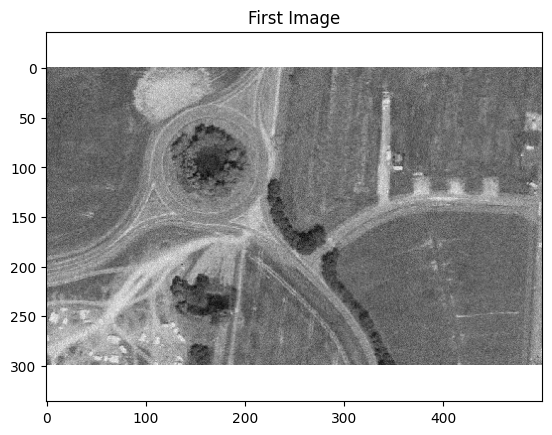

In [9]:
# Load the .mat file and show image 1
mat_contents = scipy.io.loadmat('data/ShiftedImages.mat')

# Display the structure of the loaded .mat file
print(mat_contents.keys())

# Assuming the images are stored under a key like 'images'
# Replace 'images' with the actual key in your .mat file
images = mat_contents['Images']

# Reshape the array to separate the 6 images
reshaped_images = np.transpose(images, (2, 0, 1))

# Check the shape of the images array (for example, if it's 3D or 4D array)
print(f"Shape of matlab array: {images.shape}")
print(f"Shape of images array: {reshaped_images.shape}")

# Display the first image (assuming 3D array of shape (n_images, height, width))
plt.imshow(reshaped_images[0], cmap='gray')  # Adjust 'cmap' for color if needed
plt.axis('equal')
plt.title('First Image')
plt.show()

# # Loop through and display more images if needed
# for i in range(5):  # Adjust the range for how many images you want to show
#     plt.imshow(reshaped_images[i], cmap='gray')  # Use 'cmap=None' for color images
#     plt.axis('equal')
#     plt.title(f'Image {i+1}')
#     plt.show()


In [ ]:
# Define correlation function

def t_k(ref, image):
    """Computes the MLE of the translation for the image.

    Args:
        ref (ndarray): image de référence
        image (ndarray): image translatée
        tau (int): translation

    Returns:
        int: translation (floor)
    """
    
    res = correlate2d(ref, image, mode="valid")
    
    m = np.max(res)
    
    x_k, y_k = np.where(res == m)
    
    return x_k, y_k
    
    # sum = 0
    
    # for i in range(len(image[0])):
    #     for j in range(len(image[1])):
    #         sum += image[i][j]*ref[i-tau][j-tau]
            
    # return np.floor(sum)

In [ ]:
if __name__ == "__main__":
    
    f_1 = reshaped_images[0]

    k = 1
    f_k = reshaped_images[k]
    
    a, b = t_k(f_1, f_k)


$\rightsquigarrow \quad$ You shall construct a sequence with the registered images to check that they are well superposed.



$\rightsquigarrow \quad$ You shall also plot, on the same figure, the values of the estimated translations $\hat{x}_{k}$ and $\hat{y}_{k}$, as a function of $k$.



## Useful commands/tips:

```Matlab
[I, J] = find (X>5) % returns the row and column indices of the matrix X where X is greater than 5 .
fft2 % 2D Fourier transform of an image.
ifft2 % 2D inverse Fourier transform of an image.
fftshift % circular shift of an image so that the left top point becomes the central point.

% To successively display images of a sequence: getframe, movie. Example :
figure
for $i=1: 6$
imagesc(Images(:,:,i)), colormap(gray);
$\operatorname{Mp}(\mathrm{i})=$ getframe(gcf);
end;

clf, axes('Position', [0 0 1 1]), movie(Mp,10); % where the values of the (3-dimensional) array Images vary between 0 and 1.
```



## 2 Registration by using a region of the image

For sake of memory resources or because of time calculation, it is not always possible do compute the Fourier transform of the whole image. In this case, one has to compute the shift from a small region of the reference image. You will take a $30 \times 30$ pixels wide region.

The goal is then to choose the region of the image that leads to the highest precision for shift estimation.

$\rightsquigarrow \quad$ Choose 5 very distinct small regions in the reference image.

$\rightsquigarrow\quad$ Carry out the previous algorithm using these regions, and compare the results.

$\rightsquigarrow \quad$ What kind of image features lead to accurate shift estimation?

Q1 Which criterion could have been used to foresee this result?

$\rightsquigarrow \quad$ Using this criterion, find over the whole image the best $30 \times 30$ pixels wide region.

## Useful commands/tips:

```Matlab
M=SpectralWidth2(Im); % estimate the square of the "spectral width" of a digital image $\operatorname{Im}$ using fft2 algorithm. M is $2 \times 2$ matrix.
```
The square of the "spectral width" of an image $A(x, y)$ is defined by the matrix :

$$
\left(\begin{array}{cc}
\Delta_{\text {horiz }}^{2} & \Delta_{\text {diag }}^{2} \\
\Delta_{\text {diag }}^{2} & \Delta_{\text {vert }}^{2}
\end{array}\right)=\left(\begin{array}{ll}
\int \sigma^{2}|\widetilde{A}(\sigma, \mu)|^{2} d \sigma d \mu & \int \sigma \mu|\widetilde{A}(\sigma, \mu)|^{2} d \sigma d \mu \\
\int \sigma \mu|\widetilde{A}(\sigma, \mu)|^{2} d \sigma d \mu & \int \mu^{2}|\widetilde{A}(\sigma, \mu)|^{2} d \sigma d \mu
\end{array}\right)
$$

where $\widetilde{A}(\sigma, \mu)$ is the Fourier transform of $A(x, y)$.